# Question 1

Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\book1.csv", encoding='latin-1',index_col=0)
data.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [4]:
data.shape

(10000, 3)

In [5]:
list(data.columns)

['User.ID', 'Book.Title', 'Book.Rating']

In [6]:
#Properly arranging the name of feature
data = data.rename(columns = {"User.ID":"User_ID","Book.Title":"Book_Title","Book.Rating":"Book_Rating"})
data.head()

,User_ID,Book_Title,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


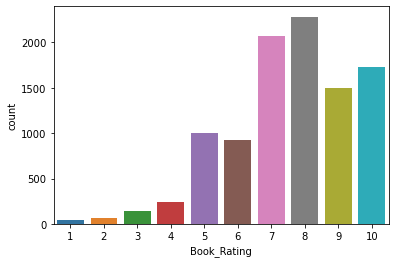

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data.Book_Rating)
plt.show()

In [8]:
data.shape

(10000, 3)

In [9]:
data.isnull().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [10]:
data.describe()

,User_ID,Book_Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [12]:
#getting the details of 5 most rated books
most_rated_books = pd.DataFrame([4755,2409,2194,4696,1616], index=np.arange(5),columns=['User_ID'])
detail = pd.merge(most_rated_books,data,on ='User_ID')
detail
most_rated_books = pd.DataFrame(data,columns=['User_ID','Book_Rating'])
most_rated_books.max()


User_ID        278854
Book_Rating        10
dtype: int64

In [13]:
most_rated_books.head()

,User_ID,Book_Rating
1,276726,5
2,276729,3
3,276729,6
4,276736,8
5,276737,6


In [16]:
#calculating mean
rating = pd.DataFrame(data.groupby('User_ID')['Book_Rating'].mean())
rating.head()

,Book_Rating
User_ID,
8,5.571429
9,6.000000
10,6.000000
12,10.000000
14,5.333333


In [17]:
#getting the description of rating
rating.describe()

,Book_Rating
count,2182.000000
mean,7.440003
std,1.655948
min,1.000000
25%,6.500000
50%,7.666667
75%,8.500000
max,10.000000


In [18]:
#sorting based on no of ratings that each book got
rating.sort_values('Book.Rating',ascending=False).head()

KeyError: 'Book.Rating'

In [19]:
#Preparing data table for analysis
Book_pivot = pd.pivot_table(index='User_ID',values='Book_Rating',columns='Book_Title',data=data)
Book_pivot.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
Book_pivot= Book_pivot.fillna(0)
Book_pivot

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [21]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [22]:
#Calculating Cosine Similarity between Users
Book_user_simi = 1 - pairwise_distances(Book_pivot.values,metric='cosine')
Book_user_simi

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
#filling daigonal values with 0 
np.fill_diagonal(Book_user_simi, 0)

In [24]:
#storing results in a dataframe
Book_user = pd.DataFrame(Book_user_simi)
Book_user.index = data.User_ID.unique()
Book_user.columns = data.User_ID.unique()


In [25]:
Book_user.iloc[0:5,0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
Book_user.head()

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#getting maximam similarities in every rows of users
Book_user.idxmax(axis=1)[0:40]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
276755    276726
276760    276726
276762    276726
276768    276726
276772      1491
276774    278543
276780    276726
276786    276726
276788    276726
276796    276726
276798    276726
276800    276726
276804    276726
276808    276726
276811    276726
276812    277533
276813      3546
276814    277828
276820      3462
276822    276726
276827    276726
276828    276726
276830    276726
276832    276726
276835    276726
276837    276726
276842    276726
276847    276726
276848    276726
276850    276726
dtype: int64

In [28]:
data[(data['User_ID']==278202) | (data['User_ID']==276737)]

,User_ID,Book_Title,Book_Rating
5,276737,The Mummies of Urumchi,6
1707,278202,The Florabama Ladies' Auxiliary &amp; Sewing C...,3
1708,278202,Howl and Other Poems (Pocket Poets),2
1709,278202,"Frankenstein: Complete, Authoritative Text Wit...",4
1710,278202,Short Stories of Ernest Hemingway (A Scribner ...,5
1711,278202,Back When We Were Grownups : A Novel (Ballanti...,3
1712,278202,To Kill a Mockingbird,9
1713,278202,Birds Bees And Babies 1994,3
1714,278202,The Cat Who Played Brahms,10
1715,278202,Black Notice,3


In [29]:
#defining function to get similar books read by two users
def get_similar_books( user1,user2):
    # Inner join between movies watched between two users will give 
    # the common movies watched.
    common_books = data[data.User_ID == user1].merge ( data[data.User_ID==user2],on = 'Book_Title', how='inner')
    return common_books.merge(data,on = 'Book_Title')

In [30]:
#geting similar books for 2 users:
get_similar_books(278202,276798)

,User_ID_x,Book_Title,Book_Rating_x,User_ID_y,Book_Rating_y,User_ID,Book_Rating
0,278202,To Kill a Mockingbird,9,276798,7,276798,7
1,278202,To Kill a Mockingbird,9,276798,7,278202,9
